In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
#binary ise BernoilliNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
yelp=pd.read_csv('restaurant.csv')
yelp.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [4]:
yelp.text.sample(20)

1857     OMG‼ Bacchanal is AMAZING.... The presentation...
3482     Certainly on my top 3 las vegas buffet, alongs...
6339     Definitely try at least once. Would I repeat i...
8926     Excellent quality overall\nRibs a little dry\n...
1872     Overpriced, long lines. Noisy. Only one variet...
3801     This location was a bit on the pricey side but...
6769     The Bacchanal Buffet is the best buffet on the...
10235    First off I'm not a buffet guy, let alone a La...
5879     We were there on Sunday at 4 PM and got right ...
5666     Overrated and overpriced.  Not that special.  ...
9736     It doesn't help anything that we went here dur...
1298     LOVE IT!!!! Best buffett in Las Vegas.... qual...
4886     This is my go-to buffet while in Las Vegas. Th...
6937     Delicious! So, trick is to come at the end of ...
8972     I'm not typically one for a buffet but holy se...
2145     My favorite buffet in Las Vegas so far!!! I've...
4920     This place is great. This is hands down the be.

In [6]:
##Lang detect

In [6]:
from langdetect import detect

In [7]:
yelp["language"]=[detect(i) for i in yelp["text"]]

In [8]:
yelpEN = yelp[yelp["language"]=="en"]

In [9]:
yelpEN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10374 entries, 0 to 10416
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10374 non-null  int64 
 1   review_id    10374 non-null  object
 2   user_id      10374 non-null  object
 3   business_id  10374 non-null  object
 4   stars        10374 non-null  int64 
 5   useful       10374 non-null  int64 
 6   funny        10374 non-null  int64 
 7   cool         10374 non-null  int64 
 8   text         10374 non-null  object
 9   date         10374 non-null  object
 10  language     10374 non-null  object
dtypes: int64(5), object(6)
memory usage: 972.6+ KB


In [10]:
yelpEN[yelpEN["language"]!="en"]

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,language


### NLP projesi adımları
- 1-Bütün cümleler küçük harfe çevirilir
- 2-Noktalama işaretleri kaldırılır.
- 3-Rakamları kaldır.
- 4-Satır sonu,\n enter a basılmışsa \r
- 5-stop words(gereksiz kelimeler) leri kaldır.
- 6-Tokenize işlemi yapıyoruz
- 7-Lemma ve stemma uygula(ekleri kaldırıp kökleri buluyoruz)
- 8-vectorizer ile yazıları rakama atıyoruz(dummie_variables gibi)

In [11]:
yelpEN['text']=yelpEN['text'].str.lower()

<ipython-input-11-68cae9ebfdec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelpEN['text']=yelpEN['text'].str.lower()


In [12]:
yelpEN['text']=yelpEN['text'].str.replace('[^\w\s]','')


<ipython-input-12-d356d21a7663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelpEN['text']=yelpEN['text'].str.replace('[^\w\s]','')


In [13]:
yelpEN['text']=yelpEN['text'].str.replace('\d+','')

<ipython-input-13-d56038ac3c93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelpEN['text']=yelpEN['text'].str.replace('\d+','')


In [14]:
yelpEN['text']=yelpEN['text'].str.replace('\n',' ').replace('\r','')

<ipython-input-14-be05c8cd9391>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelpEN['text']=yelpEN['text'].str.replace('\n',' ').replace('\r','')


In [15]:
yelp_best_worst=yelpEN[(yelpEN.stars==5)|(yelpEN.stars==1)]

yelp_best_worst.reset_index(drop=True,inplace=True)
x=yelp_best_worst.text
y=yelp_best_worst.stars

print(x.shape)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

(5278,)


In [16]:
x.sample(20)

4424    my partner was so excited to try this place ou...
367     if you dont want to read my crazy long review ...
1319    after hearing really good news about this buff...
4942    if i can give  star i would not worth the  to ...
829     this buffet was amazing julie was a wonderful ...
3906    this was my goal when i went to vegas   i look...
2623    the bacchanal buffet  caesars palace opened in...
5219    amazing food and service romulus is the homie ...
1822    well well wellcrab legs were my favorite and t...
4095    best buffet in vegas my family and i are extre...
4498    this place used be the best when first opened ...
3243    we went to dinner and we were expecting lots o...
1093    ok so i was so pumped about this place that i ...
2079    sat am brunchlunch  very impressive   items so...
2276    terrible food dry flavorless way over priced  ...
4112    wow  best buffet i have ever had the button po...
2336    im often not a fan of buffets  the idea of stu...
1263    best b

### Tokenization

In [17]:
vect=CountVectorizer(lowercase=True,stop_words='english')
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 3835)	1
  (0, 25)	1
  (0, 8345)	1
  (0, 11146)	1
  (0, 8323)	1
  (0, 652)	1
  (0, 1892)	1
  (0, 758)	1
  (0, 4004)	1
  (0, 4442)	1
  (0, 4596)	1
  (0, 3932)	1
  (0, 9239)	2
  (0, 3122)	1
  (0, 12767)	1
  (0, 9415)	1
  (0, 7759)	1
  (0, 9759)	1
  (0, 11946)	1
  (1, 8323)	2
  (1, 4004)	1
  (1, 4442)	2
  (1, 12402)	1
  (1, 6721)	1
  (1, 9124)	2
  :	:
  (3957, 8738)	1
  (3957, 3159)	2
  (3957, 10268)	1
  (3957, 2298)	1
  (3957, 5596)	1
  (3957, 3472)	1
  (3957, 10579)	1
  (3957, 5262)	1
  (3957, 10397)	1
  (3957, 2773)	1
  (3957, 1419)	1
  (3957, 12213)	1
  (3957, 3190)	1
  (3957, 7428)	1
  (3957, 5890)	1
  (3957, 6211)	1
  (3957, 5639)	1
  (3957, 1138)	1
  (3957, 1620)	2
  (3957, 1579)	1
  (3957, 5222)	1
  (3957, 1572)	1
  (3957, 8185)	1
  (3957, 273)	1
  (3957, 6243)	1


In [18]:
print(x_test)

3751    omggggg this place is amazing the wait was abo...
3586    decided to check out the supposedly best buffe...
2823    my favorite buffet in the whole world its a mu...
1070    although i was here friday morning i felt this...
5274    came him from la thanksgiving week we decided ...
                              ...                        
1676    this place is not worth waiting for a couple h...
993     our last buffet of the trip it was great and n...
2300    francisco herrera is an excellent waiter at ba...
4033    this is definitely the best buffet in town the...
5188    las vegas being sin city i guess its a great p...
Name: text, Length: 1320, dtype: object


In [19]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.columns

Index(['__', '___', '____', '_________________________', 'aa', 'aaa', 'aaahhh',
       'aaamazinnng', 'aaammmaaazzingggg', 'aahim',
       ...
       'zitis', 'zone', 'zonecold', 'zong', 'zoo', 'zorro',
       'ベガスに行くと毎回行きます種類も豊富でつつの料理のクオリティも高いです', '中国游客别去chinese',
       '価格は少し高めですが満足度が高いです', '服务很好价格也实惠'],
      dtype='object', length=12912)

In [20]:
x_train.head()

5248    first off esmeralda j was absolutely phenomena...
5094    we wanted to love it but it was really painful...
4304    i could honestly say this is the best buffet o...
2262    hands down the best in vegas price kinda sucks...
2938    enjoy the quality food hereone of my favorite ...
Name: text, dtype: object

In [21]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape

(3958, 13203)

In [22]:
vect=CountVectorizer(ngram_range=(1,2))
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape

(3958, 154293)

In [23]:
print(vect.get_feature_names()[-5000:])#son 50 kelime

['wild at', 'wild for', 'wild guess', 'wild meat', 'wild mushroom', 'wild success', 'wild this', 'wild turkey', 'wildest', 'wildest dream', 'wildest dreams', 'wildest imagination', 'wildly', 'wildly popular', 'will', 'will address', 'will admit', 'will agree', 'will all', 'will allow', 'will also', 'will always', 'will appreciate', 'will ask', 'will astound', 'will attach', 'will attend', 'will automatically', 'will avoid', 'will be', 'will begin', 'will blow', 'will boil', 'will bring', 'will burn', 'will call', 'will certainly', 'will change', 'will charge', 'will check', 'will close', 'will comback', 'will come', 'will coming', 'will compare', 'will confirm', 'will consider', 'will contact', 'will continue', 'will cook', 'will copy', 'will cost', 'will customize', 'will deceive', 'will def', 'will defiantly', 'will definatly', 'will definetly', 'will definitely', 'will die', 'will discover', 'will do', 'will drink', 'will dropping', 'will eat', 'will end', 'will enjoy', 'will entert

In [24]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm=vect.transform(x_test)

In [25]:
nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)
y_pred_class=nb.predict(x_test_dtm)


print(metrics.accuracy_score(y_test,y_pred_class))

0.946969696969697


In [27]:
### Calculate null accuracy

In [28]:
def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print ('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [29]:
vect = CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)


Features:  154293
Accuracy:  0.9159090909090909


In [30]:
vect=CountVectorizer()
tokenize_test(vect)

Features:  13203
Accuracy:  0.946969696969697


In [31]:
### Stopword removal

In [32]:
vect=CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  12912
Accuracy:  0.9401515151515152


In [33]:
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape


(10417, 19667)

In [34]:
def summarize():
    
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = str(yelp.text[review_id]) #Python3
        review_length = len(review_text)
        
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
            
    print ('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print (word)
        
    print ('\n' + review_text)

In [35]:
summarize()

TOP SCORING WORDS:
cast
iron
station
previously
style

I rated this 4/5 stars back in April 2013.  The last time I was here was about year ago when I recall it was still good but the novelty had worn off.  My recent visit this week confirmed that I probably won't be coming back again in the future.  Although there was surprisingly no line at all at 7pm on a Wednesday night, inside the restaurant it feel crowded with the usual lines at the popular stations.

In the past, I mainly came to Bacchanal for the seafood station and meat carving station.  During this visit, both of these stations were underwhelming.  The pickings were slim at the King Crab station, and the shrimp cocktail looked and tasted like the previously frozen variety of mediocre quality.   The brisket was much too fatty.  The ribs were not tender.  The tonkatsu ramen station was also previously a favorite.  Now, they do not use Japanese style slow cooked pork in the ramen but rather very common Chinese style char-siu.  T

In [36]:
### Word Cloud

In [37]:
def woc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=100).generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [38]:
### All comment

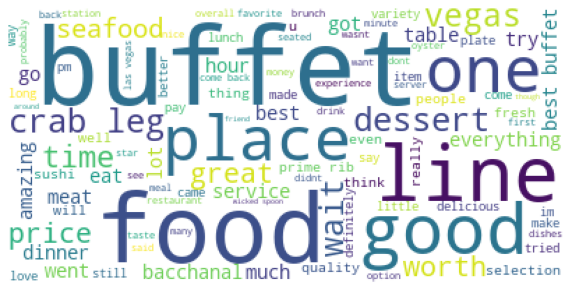

In [39]:
woc(yelpEN["text"],"white")

In [40]:
### Best comment

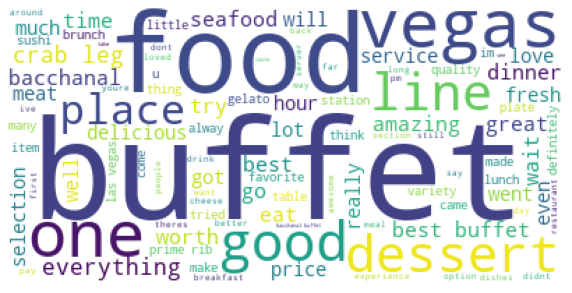

In [41]:
woc(yelpEN[(yelpEN.stars==5)]["text"],'white')

In [42]:
### Worst comment

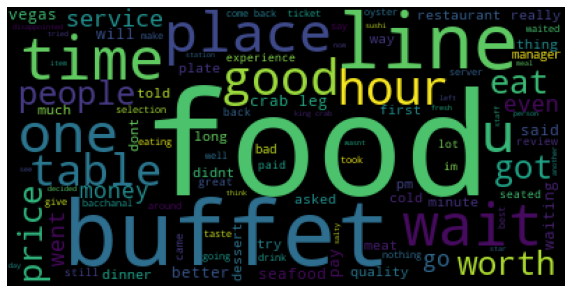

In [43]:
woc(yelpEN[(yelpEN.stars==1)]["text"],'black')